汤振礼

#### Theoretical Background 





##### 1.FM:




s(t) = rect($\frac{t-t_0}{T}$)exp(j $\pi$ K $ (t-t_0)^2$ )

##### 2.Matched Filtering:

h(t) = rect($\frac{t}{T}$)exp(-j $\pi$ K $t^2$ )<p>
$s_{out}$(t) = conv(s(t),h(t)) $\approx$ $Tsinc(KT(t-t_0))$

#### Experimental results and analysis

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf

N: 11428
TBP: 10000.0


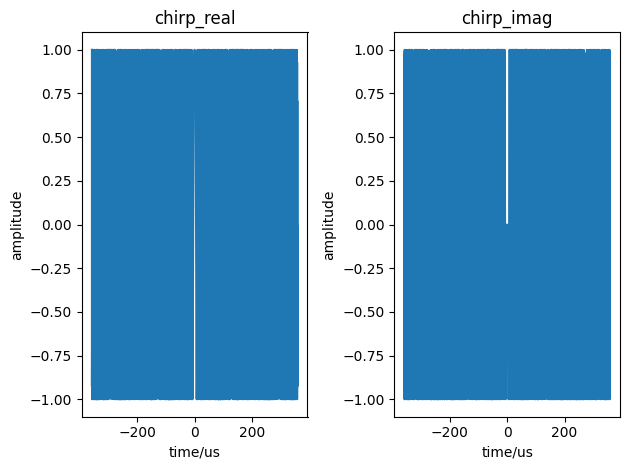

In [23]:
chirp_direction = -1
chirp_bandwidth = 1.4e+7
chirp_duration = 2.7e-5
chirp_slope = chirp_direction*chirp_bandwidth/chirp_duration
ADC_sampling_frequency = 1.600000e+7
TBP = 10000
chirp_duration = TBP/chirp_bandwidth
chirp_slope = chirp_direction*chirp_bandwidth/chirp_duration

t_interval = 1/ADC_sampling_frequency
N = int(chirp_duration/t_interval/2)*2
print('N:',N)
print('TBP:',np.abs(chirp_slope*chirp_duration**2))
t_l = np.linspace(-chirp_duration/2,chirp_duration/2-t_interval,N)
x_chirp = np.exp(1j*np.pi*chirp_slope*(t_l**2))
plt.figure()
plt.subplot(1,2,1)
plt.plot(t_l*1e+6,np.real(x_chirp))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.title('chirp_real')
plt.subplot(1,2,2)
plt.plot(t_l*1e+6,np.imag(x_chirp))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.title('chirp_imag')
plt.tight_layout()
plt.show()

[ 5 14 26 40 55 40 26 14  5]


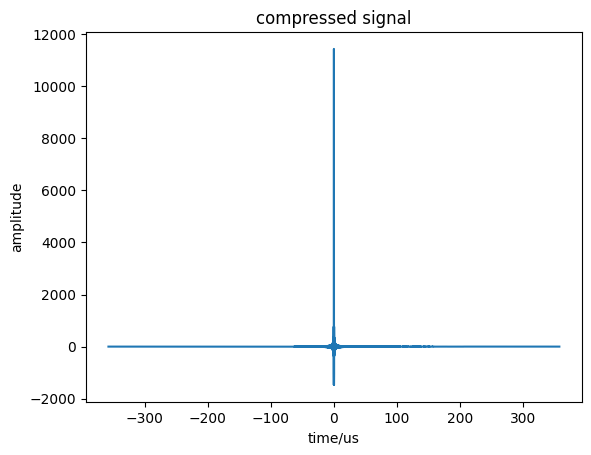

In [24]:
h_m = np.exp(-1j*np.pi*chirp_slope*((t_l+t_interval)**2))
x_mf = ss.convolve(x_chirp,h_m)
t_0_idx = np.argmax(x_mf)
plt.figure()
plt.plot(t_l*1e+6,np.real(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.title('compressed signal')
plt.xlabel('time/us')
plt.ylabel('amplitude')

xx = np.array([1,2,3,4,5])
yy = np.array([5,4,3,2,1])
print(ss.convolve(xx,yy))

11428.0
11428.000000000004
11428.000000000004
97.19854249802405


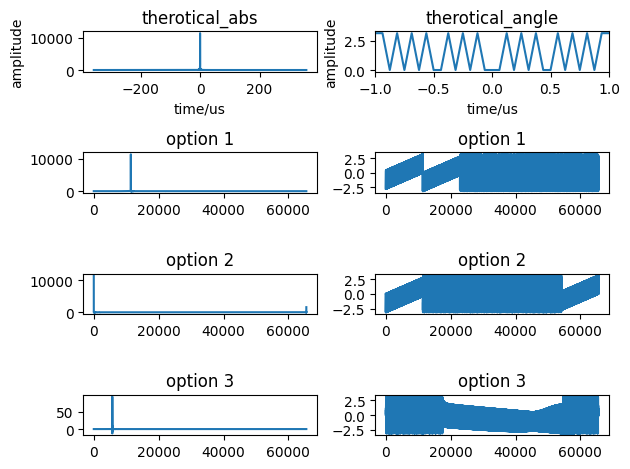

In [25]:
N_fft = int(4*2**(np.ceil(np.log2(N))))
t_0 = 0
x_chirp_shift = np.exp(1j*np.pi*chirp_slope*((t_l-t_0)**2))
x_chirp_fft = sf.fft(x_chirp_shift,N_fft)
x_chirp_fft_shift = np.fft.fftshift(x_chirp_fft)
# f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)
f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)
f_fft= np.fft.fftshift(sf.fftfreq(N_fft,t_interval))
f_l = f_fft
t_n = np.array(range(N_fft))


plt.figure()
plt.subplot(4,2,1)
plt.plot(t_l*1e+6,np.abs(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.title('therotical_abs')
plt.subplot(4,2,2)
plt.plot(t_l*1e+6,np.angle(np.real(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)])))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.title('therotical_angle')
plt.xlim(-1,1)
#option 1
plt.subplot(4,2,3)
h_1 = np.conjugate(np.flip(x_chirp_shift))
h_1_fft = sf.fft(h_1,N_fft)
x_1_mf = sf.ifft(x_chirp_fft*h_1_fft)
plt.plot(t_n,np.abs(x_1_mf))
plt.title('option 1')
plt.subplot(4,2,4)
plt.plot(t_n,np.angle(x_1_mf))
plt.title('option 1')

#option 2
plt.subplot(4,2,5)
h_2 = x_chirp_shift
h_2_fft = np.conjugate(sf.fft(h_2,N_fft))
x_2_mf = sf.ifft(x_chirp_fft*h_2_fft)
plt.plot(t_n,np.abs(x_2_mf))
plt.title('option 2')
plt.subplot(4,2,6)
plt.plot(t_n,np.angle(x_2_mf))
plt.title('option 2')

#option 3
#TBP越大，采样率越大，误差越小
plt.subplot(4,2,7)
# X(k) = X_0(k)*np.exp(-1j*2*np.pi*int(N/2)*k/N)
h_3_fft = np.exp(1j*np.pi*((f_l)**2)/chirp_slope)*np.exp(1j*np.pi/4)
width = int(np.abs(chirp_slope*chirp_duration)/(ADC_sampling_frequency/N_fft)/2)
h_3_fft[0:int(N_fft/2)-width] = 0
h_3_fft[int(N_fft/2)+width:N_fft] = 0
# np.fft.fftshift 转化为fft默认形式
x_3_mf = sf.ifft(np.fft.fftshift(x_chirp_fft_shift*h_3_fft))
plt.plot(t_n,np.real(x_3_mf))
plt.title('option 3')
plt.subplot(4,2,8)
plt.plot(t_n,np.angle(x_3_mf))
plt.title('option 3')


plt.tight_layout()

print(np.abs(x_mf).max())
print(np.abs(x_1_mf).max())
print(np.abs(x_2_mf).max())
print(np.abs(x_3_mf).max())

In [26]:
# N_fft = int(4*2**(np.ceil(np.log2(N))))
# t_0 = 0
# x_chirp_shift = np.exp(1j*np.pi*chirp_slope*((t_l-t_0)**2))
# x_chirp_fft = sf.fft(x_chirp_shift,N_fft)
# x_chirp_fft_shift = np.fft.fftshift(x_chirp_fft)
# f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)
# # f_l = np.linspace(-ADC_sampling_frequency/2+ADC_sampling_frequency/N_fft,ADC_sampling_frequency/2,N_fft)
# f_fft= np.fft.fftshift(sf.fftfreq(N_fft,t_interval))
# t_n = np.array(range(N_fft))
# print(np.sum(np.equal(f_l,f_fft)))
# plt.figure()

# plt.subplot(4,1,1)
# plt.plot(t_l*1e+6,np.real(x_chirp_shift))
# plt.xlabel('time/us')
# plt.ylabel('amplitude')
# plt.title('chirp_real')

# #option 1
# plt.subplot(4,1,2)
# h_1 = np.conjugate(np.flip(x_chirp_shift))
# h_1_fft = sf.fft(h_1,N_fft)
# x_1_mf = sf.ifft(x_chirp_fft*h_1_fft)
# plt.plot(t_n,np.real(x_1_mf))
# plt.title('option 1')

# #option 2
# plt.subplot(4,1,3)
# h_2 = x_chirp_shift
# h_2_fft = np.conjugate(sf.fft(h_2,N_fft))
# x_2_mf = sf.ifft(x_chirp_fft*h_2_fft)
# plt.plot(t_n,np.real(x_2_mf))
# plt.title('option 2')

# #option 3
# plt.subplot(4,1,4)
# # X(k) = X_0(k)*np.exp(-1j*2*np.pi*int(N/2)*k/N)
# h_3_fft = np.exp(1j*np.pi/chirp_slope*((f_l)**2))
# width = int(np.abs(chirp_slope*chirp_duration)/(ADC_sampling_frequency/N_fft)/2)
# h_3_fft[0:int(N_fft/2)-width] = 0
# h_3_fft[int(N_fft/2)+width:N_fft] = 0
# # np.fft.fftshift 转化为fft默认形式
# x_3_mf = sf.ifft(np.fft.fftshift(x_chirp_fft_shift*h_3_fft))
# plt.plot(t_n,np.real(x_3_mf))
# plt.title('option 3')

# plt.tight_layout()

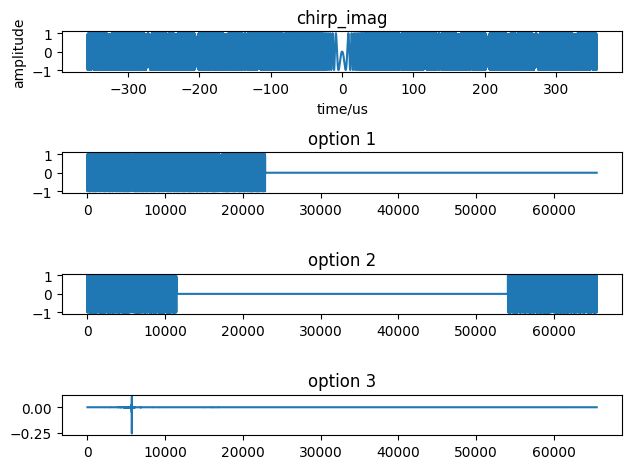

In [27]:
plt.figure()

plt.subplot(4,1,1)
plt.plot(t_l*1e+6,np.imag(x_chirp_shift))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.title('chirp_imag')

#option 1
plt.subplot(4,1,2)
h_1 = np.conjugate(np.flip(x_chirp_shift))
h_1_fft = sf.fft(h_1,N_fft)
x_1_mf = sf.ifft(x_chirp_fft*h_1_fft)
plt.plot(t_n,np.imag(x_1_mf))
plt.title('option 1')

#option 2
plt.subplot(4,1,3)
h_2 = x_chirp_shift
h_2_fft = np.conjugate(sf.fft(h_2,N_fft))
x_2_mf = sf.ifft(x_chirp_fft*h_2_fft)
plt.plot(t_n,np.imag(x_2_mf))
plt.title('option 2')

#option 3
plt.subplot(4,1,4)
# h_3_fft = np.exp(1j*np.pi/chirp_slope*(f_l**2))
# width = int(np.abs(chirp_slope*chirp_duration)/(ADC_sampling_frequency/N_fft)/2)
# h_3_fft[0:int(N_fft/2)-width] = 0
# h_3_fft[int(N_fft/2)+width:N_fft] = 0
# # np.fft.fftshift 转化为fft默认形式
# x_3_mf = sf.ifft(np.fft.fftshift(x_chirp_fft_shift*h_3_fft))
plt.plot(t_n,np.imag(x_3_mf)/np.max(np.abs(x_3_mf)))
plt.title('option 3')

plt.tight_layout()

对于序列{x[n],n=0,1,...,L},作N点(N $\geq$ L)FFT加匹配滤波得到输出序列{y[n],n=0,1,...,N-1}:<p>
对于Option 1：先反褶在取共轭，可以推导得到匹配滤波的极大值点位于L-1点<p>
对于Option 2：先FFT再取共轭，可以推导得到匹配滤波的极大值点位于0点<p>
对于Option 3：直接频域匹配滤波，可以推导得到匹配滤波的极大值点位于原信号的零频点<p>


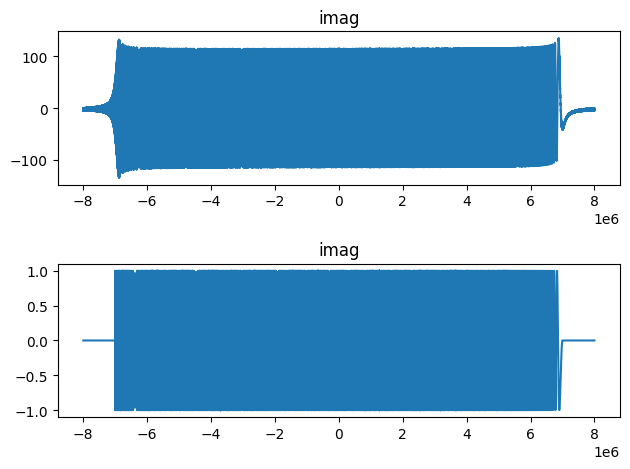

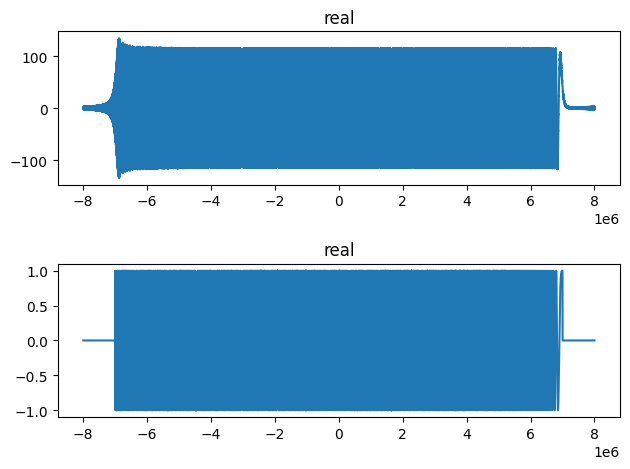

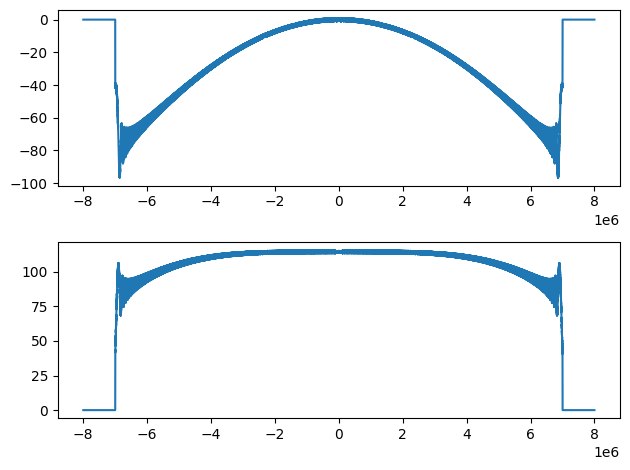

In [28]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(f_l,np.imag(x_chirp_fft_shift))
plt.title('imag')
plt.subplot(2,1,2)
plt.plot(f_l,np.imag(h_3_fft*np.exp(1j*2*np.pi*t_n*int(N/2)/N_fft)))
plt.title('imag')
plt.tight_layout()
plt.figure()
plt.subplot(2,1,1)
plt.plot(f_l,np.real(x_chirp_fft_shift))
plt.title('real')
plt.subplot(2,1,2)
plt.plot(f_l,np.real(h_3_fft*np.exp(1j*2*np.pi*t_n*int(N/2)/N_fft)))
plt.title('real')
plt.tight_layout()
plt.figure()
plt.subplot(2,1,1)
plt.plot(f_l,np.real(x_chirp_fft_shift)*np.imag(h_3_fft*np.exp(1j*2*np.pi*t_n*int(N/2)/N_fft))+\
        np.imag(x_chirp_fft_shift)*np.real(h_3_fft*np.exp(1j*2*np.pi*t_n*int(N/2)/N_fft)))
plt.subplot(2,1,2)
plt.plot(f_l,np.real(x_chirp_fft_shift)*np.real(h_3_fft*np.exp(1j*2*np.pi*t_n*int(N/2)/N_fft))-\
        np.imag(x_chirp_fft_shift)*np.imag(h_3_fft*np.exp(1j*2*np.pi*t_n*int(N/2)/N_fft)))
plt.tight_layout()


In [29]:
print('length of chirp:',len(x_chirp))
print('option 1 idx:',np.argmax(np.real(x_1_mf)))
print('option 2 idx:',np.argmax(np.real(x_2_mf)))
print('option 3 idx:',np.argmax(np.real(x_3_mf)))

N_1 = np.argmax(np.real(x_1_mf))
N_2 = np.argmax(np.real(x_2_mf))
N_3 = np.argmax(np.real(x_3_mf))
print(np.angle(x_1_mf[N_1:N_1+10]))
print(np.angle(x_2_mf[N_2:N_2+10]))
print(np.angle(x_3_mf[N_3:N_3+10]),x_3_mf[N_3:N_3+10])

length of chirp: 11428
option 1 idx: 11427
option 2 idx: 0
option 3 idx: 5714
[-2.10227799e-17  2.40540216e-04 -3.14111157e+00  7.21620647e-04
 -3.14063049e+00  1.20270108e-03 -3.14014941e+00  1.68378151e-03
  1.92432173e-03 -3.13942779e+00]
[ 3.52803438e-20  2.40540216e-04 -3.14111157e+00  7.21620647e-04
 -3.14063049e+00  1.20270108e-03 -3.14014941e+00  1.68378151e-03
  1.92432173e-03 -3.13942779e+00]
[-0.25726296  0.51934983  2.69130696 -0.68640498  2.37274694 -0.80810041
  2.30667353 -0.87790739 -0.35085935  2.3866748 ] [ 93.99973827-24.73066658j  17.61524948+10.07061774j
 -12.6435774  +6.11199972j   9.02801369 -7.39674264j
  -6.66867504 +6.45148448j   4.65110289 -4.86722754j
  -2.80440768 +3.09688443j   1.15294036 -1.38874254j
   0.23222427 -0.0849947j   -1.28372412 +1.20775941j]


点目标分析

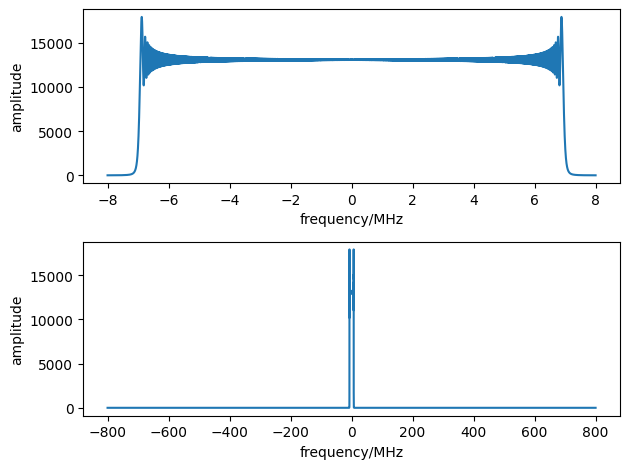

In [30]:
#option 1
plt.figure()
x_1_fft_shift = np.fft.fftshift(sf.fft(np.real(x_1_mf[int(N/2)-1:int(N/2)+len(x_chirp)-1])))
f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N,N)
# f_l = np.fft.fftfreq(N,t_interval)
plt.subplot(2,1,1)
plt.plot(f_l*1e-6,np.abs(x_1_fft_shift))
# plt.plot(t_l*1e+6,np.real(x_1_mf[int(N/2)-1:int(N/2)+len(x_chirp)-1]))
plt.xlabel('frequency/MHz')
plt.ylabel('amplitude')

#100 oversampling
S = 100
x_1_fft = sf.fft(np.real(x_1_mf[int(N/2)-1:int(N/2)+len(x_chirp)-1]))
x_os_fft = np.zeros(S*N,dtype=np.complex128)
x_os_fft[0:int(N/2)] = x_1_fft[0:int(N/2)]
x_os_fft[S*N-int(N/2):S*N] = x_1_fft[int(N/2):N]
f_l_os = np.linspace(-S*ADC_sampling_frequency/2,S*ADC_sampling_frequency/2-ADC_sampling_frequency/N,S*N)
plt.subplot(2,1,2)
plt.plot(f_l_os*1e-6,np.fft.fftshift(np.abs(x_os_fft)))
plt.xlabel('frequency/MHz')
plt.ylabel('amplitude')
plt.tight_layout()

# #option 3
# plt.figure()
# x_3_fft_shift = np.fft.fftshift(sf.fft((x_3_mf[0:N])))
# f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N,N)
# # f_l = np.fft.fftfreq(N,t_interval)
# plt.subplot(2,1,1)
# plt.plot(f_l*1e-6,np.abs(x_3_fft_shift))
# # plt.plot(t_l*1e+6,np.real(x_1_mf[int(N/2)-1:int(N/2)+len(x_chirp)-1]))
# plt.xlabel('frequency/MHz')
# plt.ylabel('amplitude')

# #100 oversampling
# S = 100
# x_3_fft = sf.fft((x_3_mf[0:N]))
# x_os_fft = np.zeros(S*N,dtype=np.complex128)
# x_os_fft[0:int(N/2)] = x_3_fft[0:int(N/2)]
# x_os_fft[S*N-int(N/2):S*N] = x_3_fft[int(N/2):N]
# f_l_os = np.linspace(-S*ADC_sampling_frequency/2,S*ADC_sampling_frequency/2-ADC_sampling_frequency/N,S*N)
# plt.subplot(2,1,2)
# plt.plot(f_l_os*1e-6,np.fft.fftshift(np.abs(x_os_fft)))
# plt.xlabel('frequency/MHz')
# plt.ylabel('amplitude')
# plt.tight_layout()

[49]
IRW(us): 0.06375318766221189
PSLR(dB): -13.261545988147086
ISLR(dB) -9.682503911387094


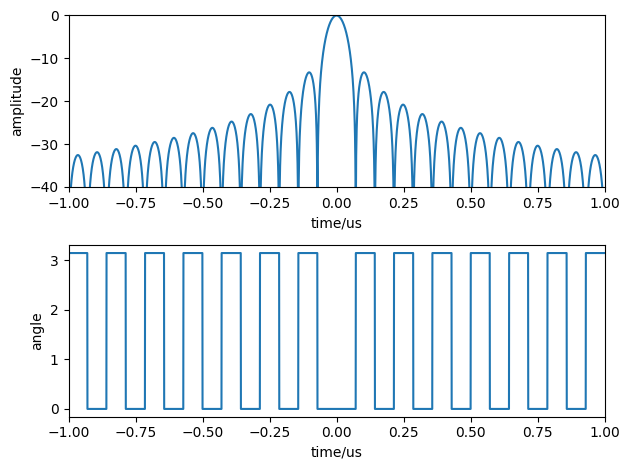

In [ ]:
x_os = np.real(sf.ifft((x_os_fft)))
# x_os = (sf.ifft((x_os_fft)))
x_os = x_os/np.max(np.abs(x_os))
t_interval_os = t_interval/S
t_os = np.linspace(-chirp_duration/2,chirp_duration/2-t_interval_os,S*N)
plt.figure()
plt.subplot(2,1,1)
plt.plot(t_os*1e+6,20*np.log10(np.abs(x_os)))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.ylim(-40,0)
plt.xlim(-1,1)
plt.subplot(2,1,2)
plt.plot(t_os*1e+6,(np.angle(x_os)))
plt.xlabel('time/us')
plt.ylabel('angle')
plt.xlim(-1,1)
plt.tight_layout()
t_idx_peak = np.argmax(np.abs(x_os))
t_idx_3dB = np.abs((np.abs(x_os)**2-0.5)).argmin()
IRW = np.abs(2*(t_os[t_idx_peak]- t_os[t_idx_3dB]))
t_elex_index = ss.argrelextrema(np.abs(x_os),np.greater)
t_elex=np.sort(np.abs(x_os)[t_elex_index])
PSLR = 10*np.log10((t_elex[-2]/t_elex[-1])**2)

#将极值点按主瓣距离排序
t_index = np.array(t_elex_index)[:,(np.argsort(np.abs(np.array(t_elex_index) -t_idx_peak)))].flatten()
t_zero_index_L = np.array(ss.argrelextrema(np.abs(x_os[min(t_index[1],t_index[2]):t_idx_peak]),np.less)[0]).flatten()
t_zero_index_R = np.array(ss.argrelextrema(np.abs(x_os[t_idx_peak:max(t_index[1],t_index[2])]),np.less)[0]).flatten()

t_zero_index = np.array([t_zero_index_L,t_zero_index_R]).flatten()

ISLR = 10*np.log10(np.sum(np.abs(x_os)**2)/np.sum(np.abs(x_os[min(t_index[1],t_index[2])+t_zero_index[0]:\
                                                                t_idx_peak+t_zero_index[1]])**2)-1)

print('IRW(us):',IRW*1e+6)
print('PSLR(dB):',PSLR)
print('ISLR(dB)',ISLR)